In [124]:
# Add the shared code directory to the module search path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'shared_code')))

from pauli_channel_approximation import PCA

In [125]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [178]:
import dill
data = {'sparsity':{}, 'agi':{}}
sample_values = [0,'1e-15','1e-10', '1e-07', '1e-06', '5e-07', '1e-05', '0.001']
sample_values = [0, '0.001','0.0001']
for ind, eta in enumerate(sample_values):
    with open(f'sparsity{eta}.pkl', 'rb') as f:
        data['sparsity'][eta] = dill.load(f)
    with open(f'agi{ind}.pkl', 'rb') as f:
        data['agi'][eta] = dill.load(f)

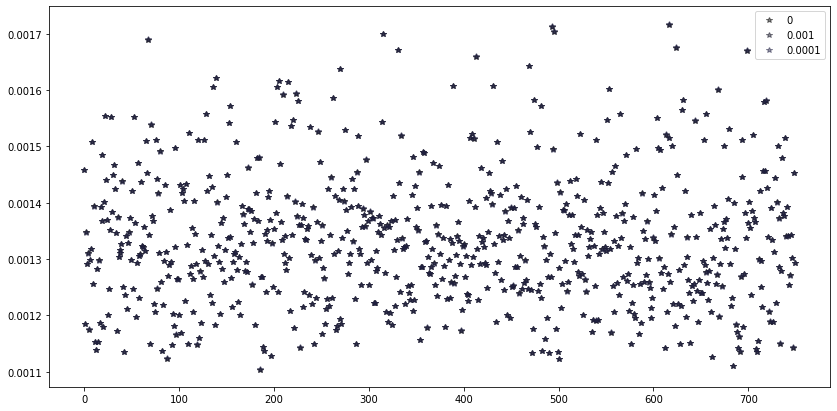

In [179]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['agi'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

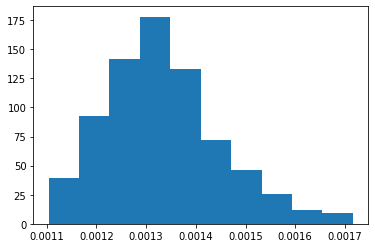

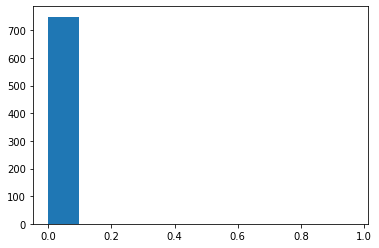

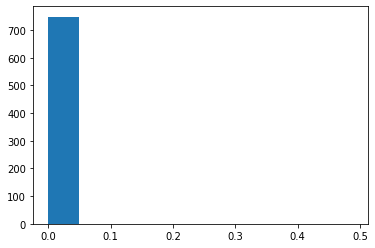

In [180]:
for ind,eta in enumerate(sample_values):
    plt.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.show()

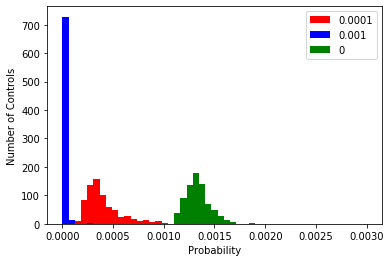

In [194]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
colors = ['r','b','g','y','k','m','c']
for ind,eta in enumerate(sample_values[::-1]):
    ax.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0], color=colors[ind], label=eta,
           bins=np.linspace(0,.003,50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel('Probability')
plt.savefig("sparisity-versus-parameter.png")
plt.show()

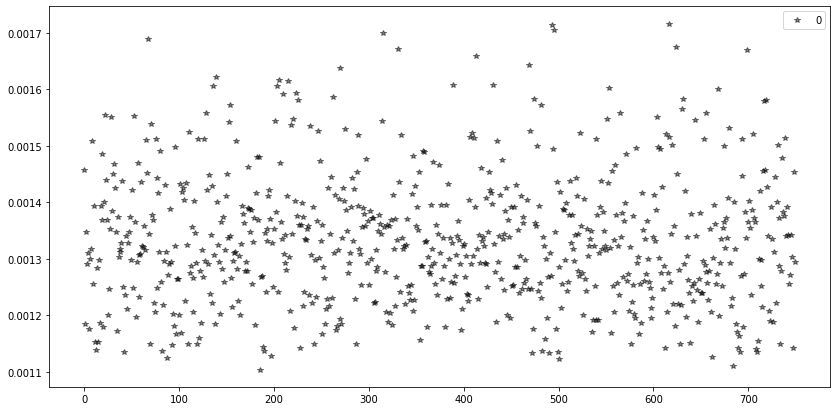

In [182]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate([0]):
    plt.plot(np.arange(750), data['sparsity'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

In [9]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['agi'][eta]['weights'][0].T.tolist()[0])
    print(data['agi'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.1 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [10]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['sparsity'][eta]['weights'][0].T.tolist()[0])
    print(data['sparsity'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-07 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-10 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-12 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-15 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
